<a href="https://colab.research.google.com/github/Otaboyev0727/Loyihalar/blob/main/AirTicket_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AirTicket price prediction**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
train = pd.read_csv("/content/train_data.csv", index_col='id')
test = pd.read_csv('/content/test_data.csv', index_col='id')
solution = pd.read_csv("/content/sample_solution.csv")
train.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [ ]:
train.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


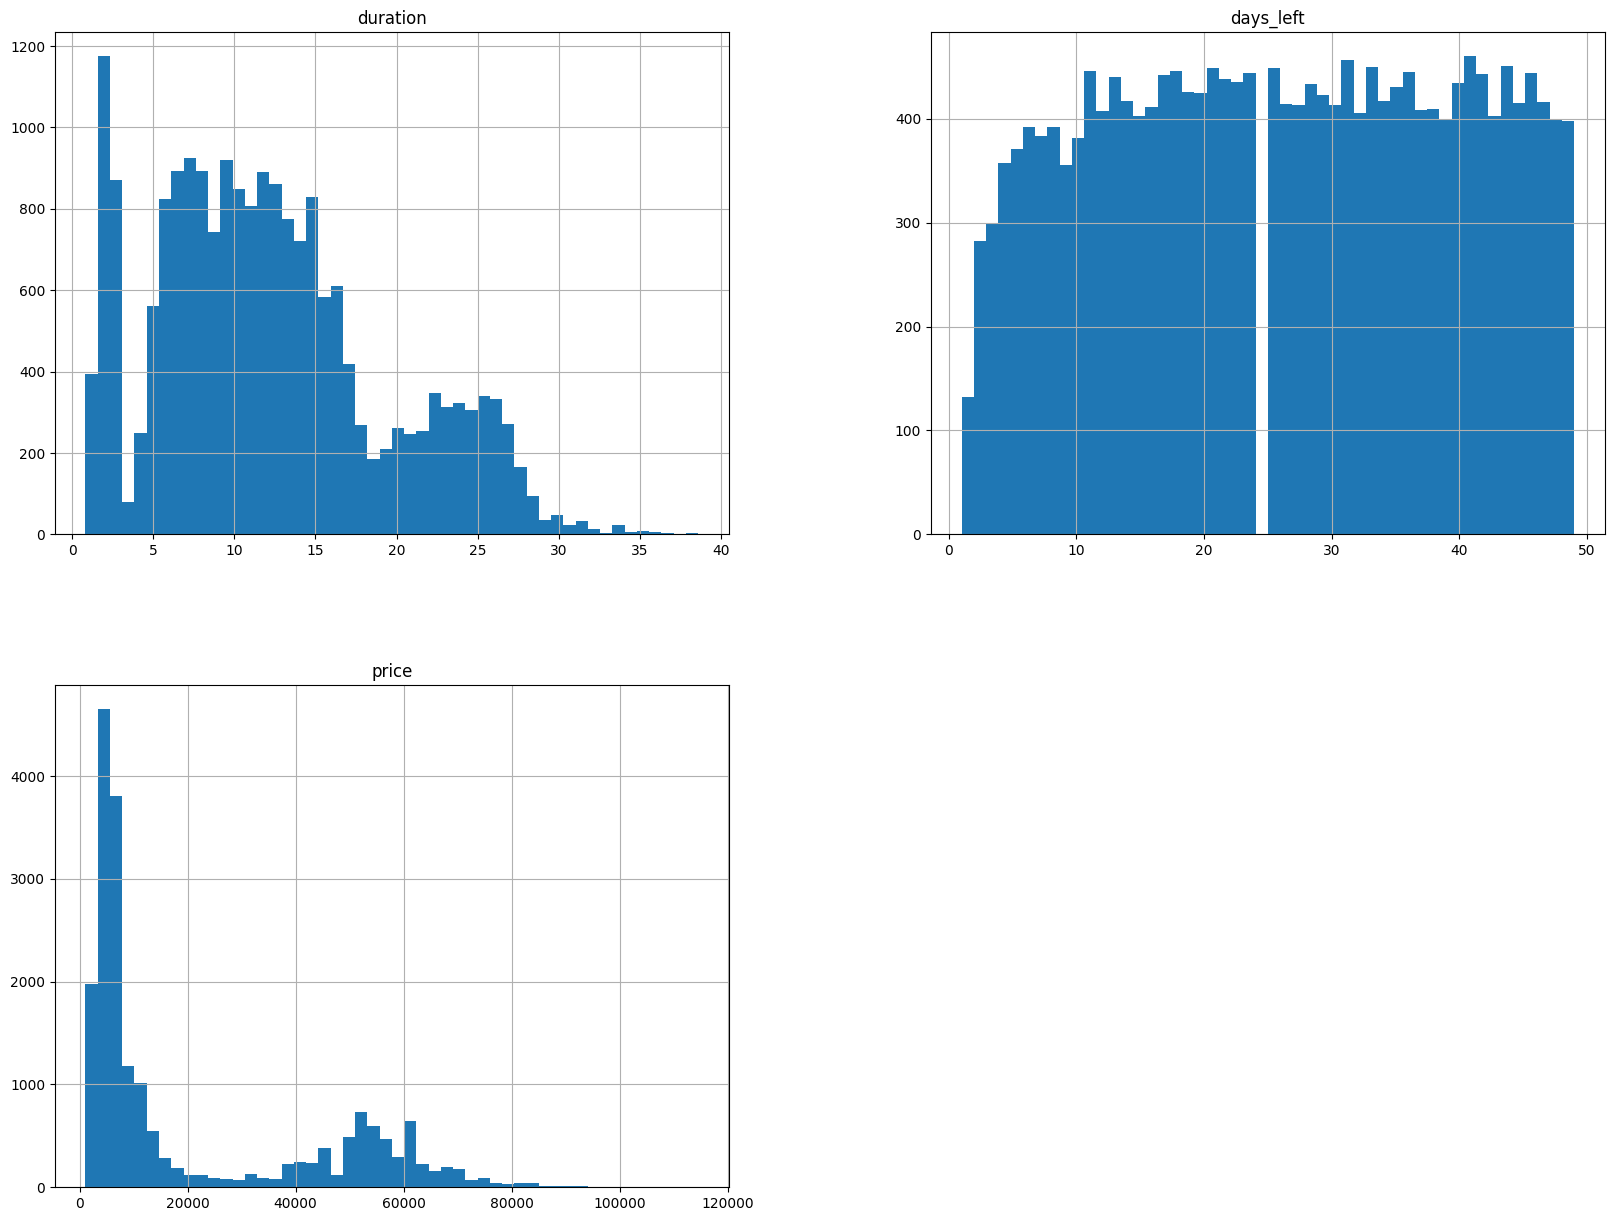

In [ ]:
%matplotlib inline
train.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
train[train['price']>80000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
237,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Business,16.33,41,85744
587,Vistara,UK-836,Chennai,Morning,one,Night,Mumbai,Business,9.50,9,80566
659,Vistara,UK-996,Mumbai,Evening,one,Evening,Bangalore,Business,22.50,2,114523
1065,Vistara,UK-810,Bangalore,Early_Morning,one,Afternoon,Mumbai,Business,7.00,10,81788
1166,Vistara,UK-772,Kolkata,Morning,one,Evening,Delhi,Business,9.33,5,83647
...,...,...,...,...,...,...,...,...,...,...,...
19198,Vistara,UK-834,Chennai,Evening,one,Morning,Hyderabad,Business,16.50,3,84497
19365,Vistara,UK-985,Delhi,Evening,one,Evening,Kolkata,Business,21.08,1,90057
19492,Vistara,UK-880,Hyderabad,Afternoon,one,Night,Chennai,Business,9.67,44,84075


In [ ]:
train[train['duration']>35]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
759,Air_India,AI-9547,Bangalore,Evening,two_or_more,Early_Morning,Chennai,Economy,37.00,9,12897
2308,Air_India,AI-9547,Bangalore,Evening,two_or_more,Early_Morning,Chennai,Economy,37.00,37,5515
2572,Air_India,AI-640,Bangalore,Early_Morning,one,Evening,Chennai,Economy,36.25,2,14002
3420,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Bangalore,Business,35.08,20,67710
4772,Air_India,AI-440,Chennai,Early_Morning,two_or_more,Night,Kolkata,Economy,37.92,8,15065
5579,Air_India,AI-430,Chennai,Morning,one,Night,Mumbai,Economy,35.33,46,5778
6342,Air_India,AI-569,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.58,3,14126
6416,Air_India,AI-610,Bangalore,Evening,two_or_more,Early_Morning,Chennai,Economy,36.83,10,13264
8280,Air_India,AI-738,Bangalore,Morning,two_or_more,Night,Hyderabad,Economy,35.75,38,8526


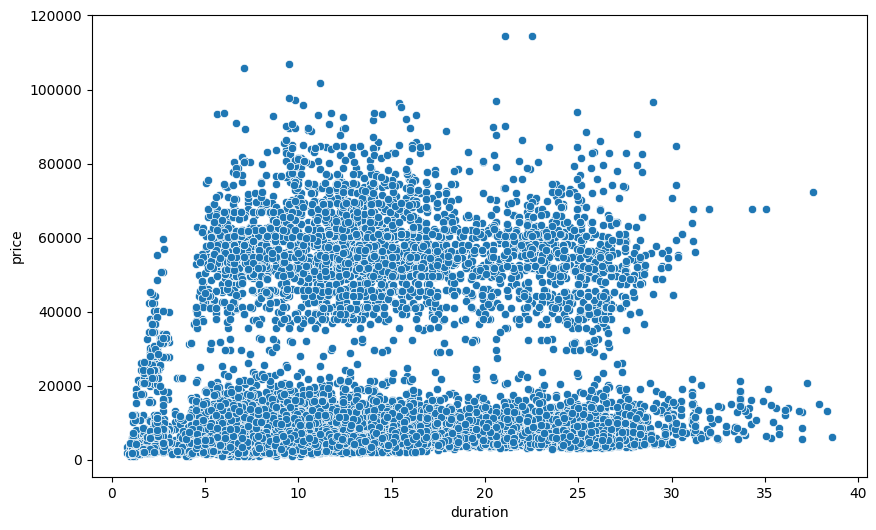

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=train,x=train["duration"],y=train.price)
plt.show()

In [ ]:
train.drop(train[train['price']>85000].index,inplace=True)

In [ ]:
train.drop(train[train['duration']>35].index,inplace=True)

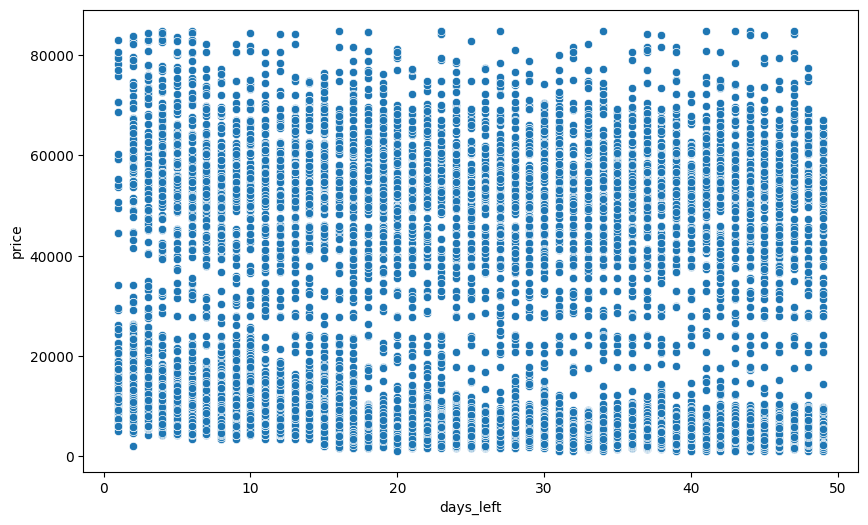

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=train,x=train["days_left"],y=train.price)
plt.show()

<ipython-input-87-34a41afcf36a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


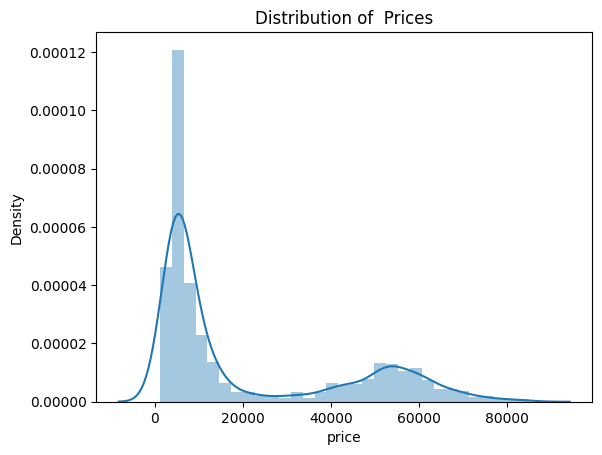

In [ ]:
sns.distplot(train['price'])
plt.title('Distribution of  Prices')
plt.show()

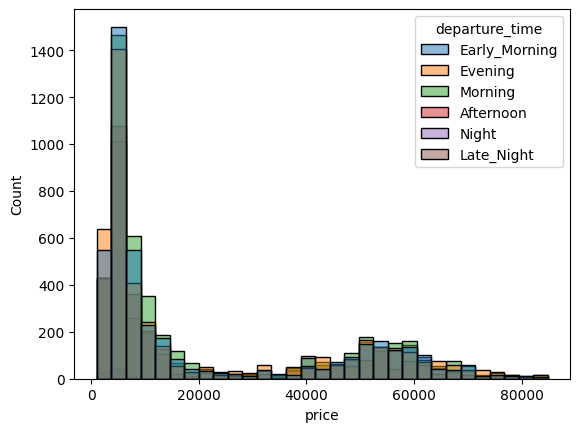

In [ ]:
sns.histplot(data=train,x='price',hue='departure_time')
plt.show()

In [ ]:
train.corrwith(train['price']).sort_values(ascending=False)

<ipython-input-89-72ccbf260314>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corrwith(train['price']).sort_values(ascending=False)


price        1.000000
duration     0.215982
days_left   -0.096951
dtype: float64

In [ ]:
X = train.drop('price', axis=1)
y =np.asanyarray(train[['price']])
     

In [ ]:
X_text = train.drop(['duration', 'days_left', 'price', 'flight'], axis=1)
X_num = train[['duration', 'days_left']]
X_text.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
id,,,,,,,
1,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy
2,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy
3,Vistara,Bangalore,Morning,one,Evening,Delhi,Business
4,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy
5,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = list(X_num)
text_attribs = list(X_text)

full_pip = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('text', OneHotEncoder(), text_attribs)
])

x= full_pip.fit_transform(X)


     

In [ ]:
x_test=full_pip.fit_transform(test)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=4)

In [ ]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_tree=tree_model.predict(x_val)
mae=mean_absolute_error(y_tree,y_val)
mse = mean_squared_error(y_tree, y_val)
print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 2084.0
RMSE= 4734.0


In [ ]:
RF_model=RandomForestRegressor(n_estimators=100)
RF_model.fit(x_train,y_train)

<ipython-input-102-61290027d4fd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
y_RF=RF_model.predict(x_val)
mae=mean_absolute_error(y_RF,y_val)
mse = mean_squared_error(y_RF, y_val)
print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 1904.0
RMSE= 3552.0


In [ ]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(x_val)
y_xgb=xgb_model.predict(x_val)
mae=mean_absolute_error(y_xgb,y_val)
mse = mean_squared_error(y_pred, y_val)
print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 2191.0
RMSE= 3693.0


In [ ]:
javob = []
for N in range(5):
    model = RandomForestRegressor(random_state=N, n_jobs=9, n_estimators=100)
    model.fit(x_train, y_train)
    preds_valid = model.predict(x_val)
    test_preds = model.predict(x_test)
    javob.append(test_preds)
    print(mean_squared_error(y_val, preds_valid, squared=False))

<ipython-input-106-72c642eb112c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


3539.820352081127


<ipython-input-106-72c642eb112c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


3562.126616102269


<ipython-input-106-72c642eb112c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


3559.3274360438695


<ipython-input-106-72c642eb112c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


3552.3855549362147


<ipython-input-106-72c642eb112c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


3560.7351357635607


In [ ]:
test_preds

array([51440.07, 56828.02, 22982.54, ..., 50135.97, 48642.75, 66423.32])

In [ ]:
solution['price'] = test_preds
solution

,id,price
0,1,51440.07
1,2,56828.02
2,3,22982.54
3,4,2584.31
4,5,5884.04
...,...,...
4995,4996,58122.91
4996,4997,4374.89
4997,4998,50135.97
4998,4999,48642.75


In [ ]:
solution.to_csv('solution.csv',index=False)